In [26]:
#  3層のニューラルネットワークでMNISTデータセットを学習する
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [27]:
#  ニューラルネットワークのクラスの定義
class neuralNetwork:
    
    #  ニューラルネットワークの初期化
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #  入力層、隠れ層、出力層のノード数の設定
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #  リンクの重み行列wihとwho
        #　行列内の重み w_i_j, ノードiから次の層のノードjへのリンクの重み、w11、w21など
        #  平均がゼロで、標準偏差を入ってくるリンクの数の平方根の逆数とした正規分布からのサンプルした値を初期値にする方法。
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        #  学習率の設定
        self.lr = learningrate
        
        #  活性化関数はシグモイド関数
        #  lambda：def()を使う代わりに関数を簡単に作成している。xを入力とし、そのシグモイド関数の値であるscipy.special.expit()を返すもの。
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    #  ニューラルネットワークの学習
    def train(self, inputs_list, targets_list):
        #　入力リストを行列に変換
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #  隠れ層に入ってくる信号の計算
        hidden_inputs = numpy.dot(self.wih, inputs)
        #  隠れ層で結合された信号を活性化関数により出力
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #  出力層に入ってくる信号の計算
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #  出力層で結合された信号を活性化関数により出力
        final_outputs = self.activation_function(final_inputs)
        
        #  出力層の誤差 = (目標出力 - 最終出力)
        output_errors = targets - final_outputs
        #  隠れ層の誤差は出力層の誤差をリンクの重みの割合で分配
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #　隠れ層と出力層の間のリンクの重みを更新
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        #  入力層と隠れ層の間のリンクの重みを更新
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    #  ニューラルネットワークへの照会
    def query(self, inputs_list):
        #  入力リストを行列に変換。「.T」は転置行列を取る。恐らく、この後で入力行列と重み行列の内積を行う際に、
        #　「重み行列（３ｘ３）ｘ入力行列（１ｘ３）」を行うので、入力行列の転置をとって「３ｘ１」にしておかないと内積ができないから。
        inputs = numpy.array(inputs_list).T
        
        #  隠れ層に入ってくる信号の計算。入力行列（inputs、実際は１ｘｎのベクトル）と重み行列（self.wih）の内積。
        hidden_inputs = numpy.dot(self.wih, inputs)
        #　隠れ層で結合された信号を活性化関数により出力
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #  出力層に入ってくる信号の計算
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #  出力層で結合された信号を活性化関数により出力
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
        pass

In [28]:
#  入力層 = 784, 隠れ層＝100、出力層＝10、学習率=0.3
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

#  ニューラルネットワークのクラスを持つオブジェクトを作成。
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [22]:
#  100行のTrainデータを読み込む
training_data_file = open("mnist_train_100.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [23]:
#  ニューラルネットワークの学習
#　訓練データの全データに対して実行。training_data_listをrecordの中に入れていく（？）
for record in training_data_list:
    #  データをコンマでSplitして、「all_values」の中に入れていく
    all_values = record.split(',')
    #  入力値のスケーリングとシフト
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    #  目標配列の生成（ラベルの位置が0.99、残りは0.01）
    targets = numpy.zeros(output_nodes)+0.01
    #  all_values[0]はこのデータのラベル
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [24]:
#  10個のテストデータを読み込む
test_data_file = open("mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [25]:
#  テストデータの最初の行を取得し、さらにそこから最初の値（正解ラベル）を取得する。
all_values = test_data_list[0].split(',')
print(all_values[0])

7


In [26]:
#  上で学習したモデルに実際に、正解が7であるはずの画像のRGBデータの784データを投入し、返り値を見る。
n.query ((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([ 0.14684073,  0.01565693,  0.05710512,  0.07632283,  0.08085886,
        0.04245679,  0.00906664,  0.83457858,  0.04902151,  0.0408691 ])

In [28]:
all_values = test_data_list[1].split(',')
n.query ((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([ 0.23614827,  0.06796785,  0.12633074,  0.35294899,  0.0032089 ,
        0.02427146,  0.16791441,  0.0190274 ,  0.20770784,  0.00218172])

In [30]:
print(all_values[0])

2


In [31]:
all_values = test_data_list[2].split(',')
n.query ((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([ 0.05842157,  0.88991746,  0.07152242,  0.09654571,  0.02669291,
        0.0609351 ,  0.09122812,  0.08004687,  0.13693876,  0.00729743])

In [32]:
print(all_values[0])

1


In [39]:
#  テストデータ全てに対してテストを実行。
#　Scorecardは判定のリスト、最初は空
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])  #　全ての行から0番目の値だけをcorrect_labelとして取り出している。
    print(correct_label, "correct label")  #　それを印刷
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 *0.99) + 0.01  #　全ての行から1番目以降の値をinputsとして取り出している。
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)  #　outputs配列の中の最も大きい数字の列数を返す。値ではなく。
    print(label, "network's answer")
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
4 network's answer
5 correct label
1 network's answer
9 correct label
7 network's answer


In [40]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [41]:
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6


In [29]:
#  全てのデータセットでTrainを実行
#  Trainデータを読み込む
training_data_file = open("mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [30]:
#  ニューラルネットワークの学習
#　訓練データの全データに対して実行。training_data_listをrecordの中に入れていく（？）
for record in training_data_list:
    #  データをコンマでSplitして、「all_values」の中に入れていく
    all_values = record.split(',')
    #  入力値のスケーリングとシフト
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    #  目標配列の生成（ラベルの位置が0.99、残りは0.01）
    targets = numpy.zeros(output_nodes)+0.01
    #  all_values[0]はこのデータのラベル
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [44]:
#  全てのテストデータを読み込む
test_data_file = open("mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [45]:
#  テストデータ全てに対してテストを実行。
#　Scorecardは判定のリスト、最初は空
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])  #　全ての行から0番目の値だけをcorrect_labelとして取り出している。
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 *0.99) + 0.01  #　全ての行から1番目以降の値をinputsとして取り出している。
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)  #　outputs配列の中の最も大きい数字の列数を返す。値ではなく。
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

In [46]:
scorecard_array = numpy.asarray(scorecard)

print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9466


In [31]:
import numpy
import scipy.misc
img_array = scipy.misc.imread("aaa.png", flatten=True)
numpy.shape(img_array)

(28, 28)

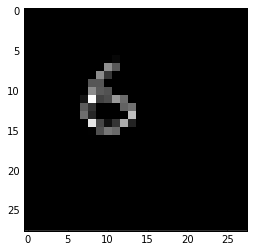

In [23]:
import matplotlib.pyplot
#  作図を埋め込む指示
%matplotlib inline
matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')

In [32]:
img_data = 255.0 - img_array.reshape(784)
img_data = (img_data/255.0*0.99)+0.01
numpy.shape(img_data)

(784,)

In [35]:
answer = n.query(img_data)
print("network answer is", numpy.argmax(answer))

network answer is 5


In [41]:
import numpy
import scipy.misc
img_array = scipy.misc.imread("One.png", flatten=True)
numpy.shape(img_array)

(28, 28)

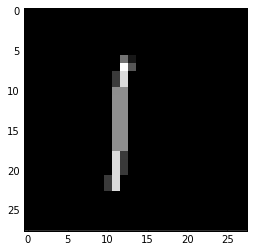

In [42]:
import matplotlib.pyplot
#  作図を埋め込む指示
%matplotlib inline
matplotlib.pyplot.imshow(img_array, cmap='Greys', interpolation='None')

In [43]:
img_data = 255.0 - img_array.reshape(784)
img_data = (img_data/255.0*0.99)+0.01
numpy.shape(img_data)

(784,)

In [44]:
answer = n.query(img_data)
print("network answer is", numpy.argmax(answer))

network answer is 5


In [45]:
print(answer)

[  1.13284350e-04   3.53764749e-05   3.08670669e-04   9.87062615e-06
   1.21470703e-04   3.31034324e-01   9.77227471e-04   3.03089141e-05
   1.26639491e-04   1.90064124e-06]
